In [1]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt


In [3]:
# Load the CSV file
df = pd.read_csv("/content/sample_data/Car_sales.csv")


In [4]:
# Convert to datetime (automatically handle different formats)
df['Latest_Launch'] = pd.to_datetime(df['Latest_Launch'], errors='coerce', infer_datetime_format=True)

# Drop rows where conversion failed
df = df.dropna(subset=['Latest_Launch'])


<ipython-input-4-18e7dd278eeb>:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Latest_Launch'] = pd.to_datetime(df['Latest_Launch'], errors='coerce', infer_datetime_format=True)


In [5]:
# Group by date and sum up the sales
sales_ts = df.groupby('Latest_Launch')['Sales_in_thousands'].sum().sort_index()


In [6]:
# Resample to monthly data, fill missing months with 0
sales_ts = sales_ts.resample('M').sum().fillna(0)


<ipython-input-6-d2858bff401e>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sales_ts = sales_ts.resample('M').sum().fillna(0)


In [25]:
# Decompose with a seasonal period of 6 (since we have <24 months)
decomposition = seasonal_decompose(sales_ts, model='additive', period=6)


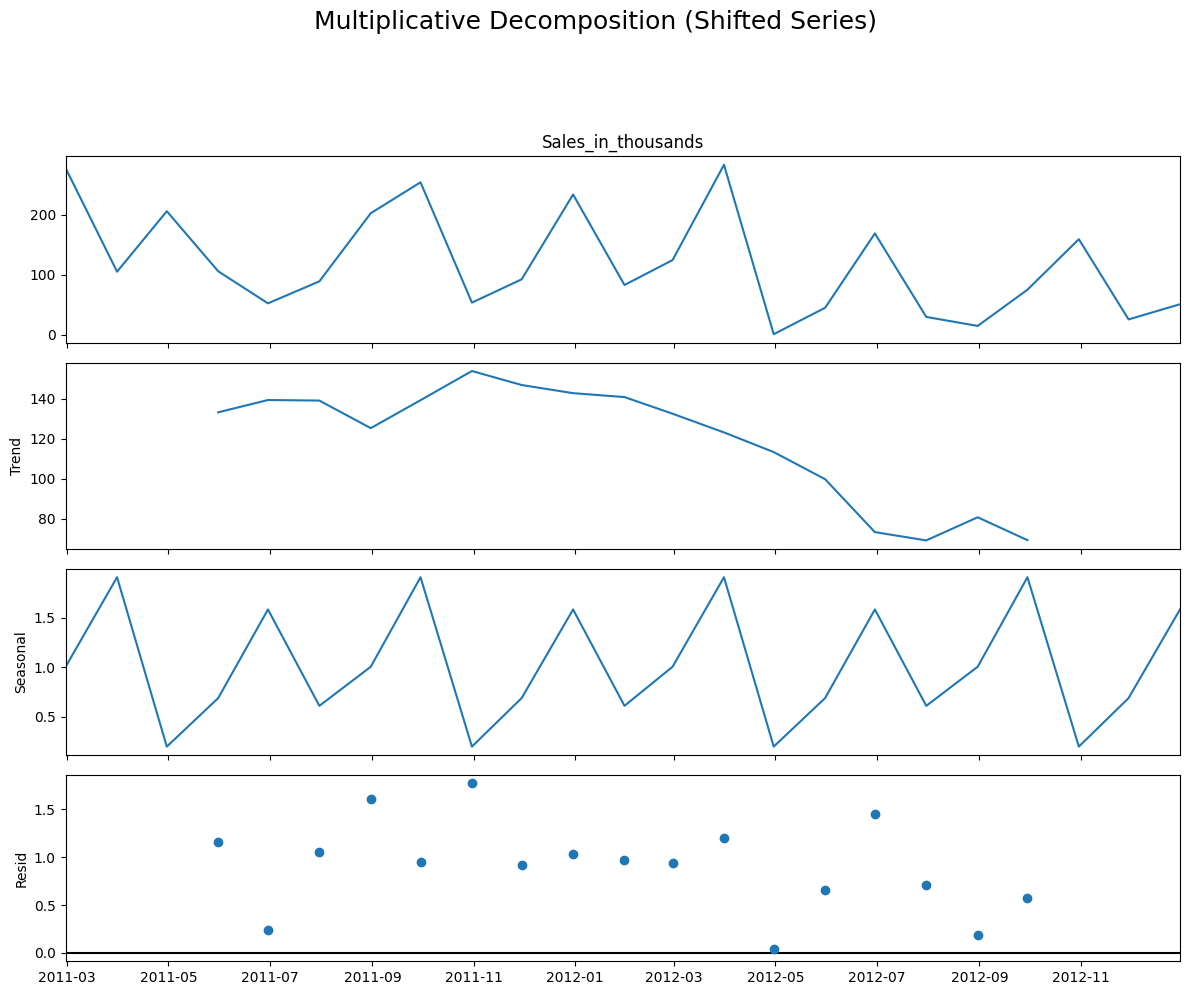

In [28]:
# Shift series to make all values positive (e.g., +1 if min is 0)
shifted_ts = sales_ts + 1

# Multiplicative decomposition (use only if shift is okay)
multiplicative_decomp = seasonal_decompose(shifted_ts, model='multiplicative', period=6)
fig2 = multiplicative_decomp.plot()
fig2.set_size_inches(12, 10)
plt.suptitle("Multiplicative Decomposition (Shifted Series)", fontsize=18, y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
